In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# Laoding the dataset 
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Basic Information:

Display basic information about the Titanic dataset (number of rows, columns, data types).

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
print(titanic.columns)
print(len(titanic.columns))

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
15


In [10]:
titanic['alive'].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [11]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

Survival Rate:

Calculate the overall survival rate of passengers on the Titanic.
Calculate the survival rate by gender.

In [13]:
overall_survival_rate=titanic['survived'].mean()
print("Overall Survival Rate:{:.2%}".format(overall_survival_rate))

Overall Survival Rate:38.38%


In [17]:
#survival rate by gender 
gender_wise_survival_rate=titanic.groupby('sex')['survived'].mean()
print(gender_wise_survival_rate)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


Age Distribution:

Plot a histogram showing the distribution of passenger ages.

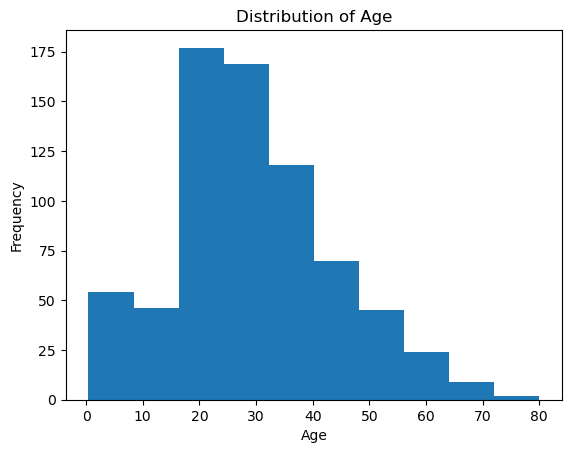

In [18]:
plt.hist(titanic['age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

Class Distribution:

Display the count of passengers in each class (1st, 2nd, 3rd).

In [22]:
titanic['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

Embarked Locations:

Identify and display the unique values in the 'embarked' column.

In [23]:
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Missing Values:

Identify and handle missing values in the dataset (e.g., fill missing age values).

In [24]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
mean_age=titanic['age'].mean()
titanic['age'].fillna(mean_age,inplace=True)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
titanic['deck'].fillna("Unknown",inplace=True)
titanic.isnull().sum()

TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

In [34]:
print("Number of missing values in 'deck' column:", titanic['deck'].isnull().sum())
titanic['deck'].fillna('C', inplace=True)

Number of missing values in 'deck' column: 687


In [36]:
print("Number of missing values in 'Embarked' column:", titanic['embark_town'].isnull().sum())

Number of missing values in 'Embarked' column: 2


In [39]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0],inplace=True)
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [41]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace=True)
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Family Size:

Create a new column 'family_size' that represents the total number of family members (siblings/spouses + parents/children) for each passenger.

In [44]:
titanic['Family_Size']=titanic['sibsp']+titanic['parch']+1


In [45]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,1


Fare Analysis:

Calculate the average fare paid by passengers.
Compare the average fare by passenger class.

In [46]:
titanic['fare'].mean()

32.204207968574636

In [47]:
titanic.groupby('pclass')['fare'].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

Age Analysis:

Find the oldest and youngest passengers on the Titanic.
Calculate the average age of passengers.

In [48]:
titanic['age'].agg(['max','min'])

max    80.00
min     0.42
Name: age, dtype: float64

In [49]:
titanic['age'].mean()

29.69911764705882

Survival by Class and Gender:

Calculate the survival rate for each combination of passenger class and gender.

In [52]:
print(titanic.groupby('pclass')['survived'].mean())
print(titanic.groupby('sex')['survived'].mean())

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [54]:
titanic.groupby(['pclass','sex'])['survived'].mean()

pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

Age Group Analysis:

Create age groups (e.g., child, adult, senior) and analyze the survival rates within each group.

In [56]:
age_bins=[0,18,35,60,150]
age_labels=['child','adult','middle-aged','senior']
titanic['age_group']=pd.cut(titanic['age'],bins=age_bins,labels=age_labels,right=False)
titanic.groupby('age_group')['survived'].mean()

C:\Users\BTWO LAPTOP 77\AppData\Local\Temp\ipykernel_6880\3765224564.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('age_group')['survived'].mean()


age_group
child          0.539823
adult          0.344383
middle-aged    0.416268
senior         0.269231
Name: survived, dtype: float64

Fare Distribution:

Visualize the distribution of fares. Identify any outliers and explore their characteristics.

In [58]:
titanic['fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: fare
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [59]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

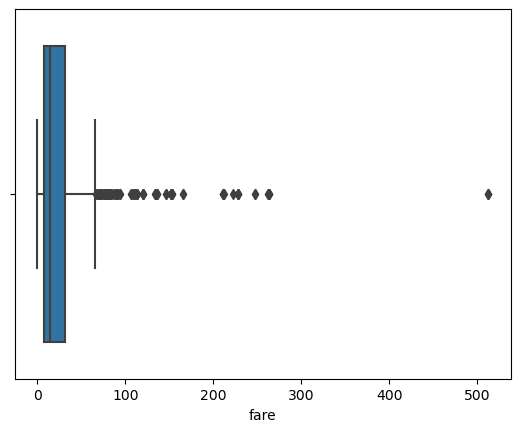

In [60]:
sns.boxplot(x="fare",data=titanic)
plt.show()

In [61]:
Q1=titanic['fare'].quantile(0.25)
Q3=titanic['fare'].quantile(0.75)
IQR=Q3-Q1
outliers=(titanic['fare']<Q1-1.5*IQR) | (titanic['fare']>Q3+1.5*IQR)
print(titanic[outliers])

     survived  pclass     sex        age  sibsp  parch      fare embarked  \
1           1       1  female  38.000000      1      0   71.2833        C   
27          0       1    male  19.000000      3      2  263.0000        S   
31          1       1  female  29.699118      1      0  146.5208        C   
34          0       1    male  28.000000      1      0   82.1708        C   
52          1       1  female  49.000000      1      0   76.7292        C   
..        ...     ...     ...        ...    ...    ...       ...      ...   
846         0       3    male  29.699118      8      2   69.5500        S   
849         1       1  female  29.699118      1      0   89.1042        C   
856         1       1  female  45.000000      1      1  164.8667        S   
863         0       3  female  29.699118      8      2   69.5500        S   
879         1       1  female  56.000000      0      1   83.1583        C   

     class    who  adult_male deck  embark_town alive  alone  Family_Size  

Cabin Class Survival:

Investigate the relationship between cabin class and survival. Are passengers in higher classes more likely to survive?

AttributeError: 'numpy.int64' object has no attribute 'startswith'

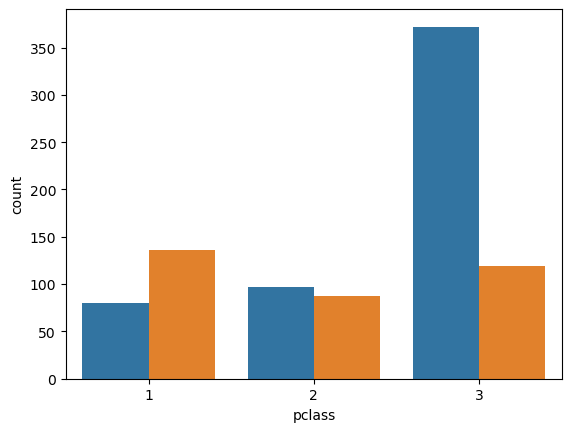

In [66]:
sns.countplot(x='pclass',hue='survived',data=titanic)
plt.show()

In [72]:
y=titanic.groupby('pclass')['survived'].value_counts()
print(y)
print(type(y))

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


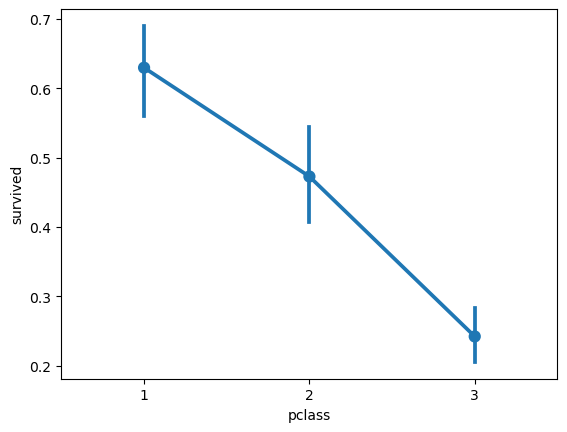

In [76]:
sns.pointplot(x='pclass',y='survived',data=titanic)
plt.show()

Solo Travelers:

Identify and analyze passengers who were traveling alone. What is the survival rate among solo travelers compared to those with family?

In [77]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'Family_Size', 'age_group'],
      dtype='object')

In [78]:
titanic['Family_Size'].value_counts()

Family_Size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [83]:
titanic.groupby(titanic['Family_Size']==1)['survived'].value_counts()

Family_Size  survived
False        1           179
             0           175
True         0           374
             1           163
Name: count, dtype: int64

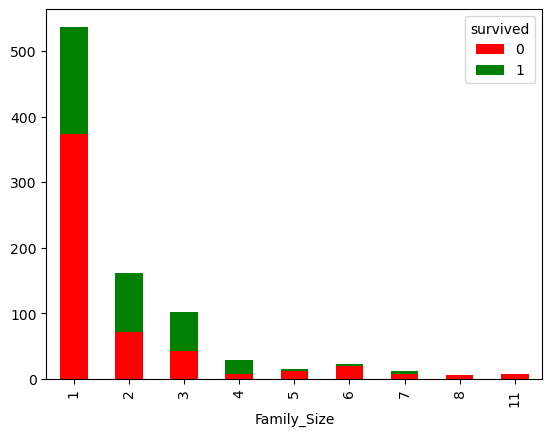

In [85]:
grouped_counts = titanic.groupby(['Family_Size', 'survived']).size().unstack()
grouped_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.show()

In [87]:
titanic.groupby(titanic['Family_Size']==1)['survived'].mean()


Family_Size
False    0.505650
True     0.303538
Name: survived, dtype: float64

Title Extraction:

Extract titles from the 'name' column (e.g., Mr., Mrs., Dr.) and analyze survival rates based on titles.

In [88]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'Family_Size', 'age_group'],
      dtype='object')

In [89]:
titanic['who']

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: object

In [90]:
# Extract titles from the 'name' column
titanic['title'] = titanic['name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# Display unique titles
unique_titles = titanic['title'].unique()
print("Unique Titles:", unique_titles)

# Analyze survival rates based on titles
survival_rate_by_title = titanic.groupby('title')['survived'].mean().sort_values(ascending=False)
print("\nSurvival Rates by Title:")
print(survival_rate_by_title)


KeyError: 'name'

In [91]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Family_Size,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,middle-aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,1,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,middle-aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,1,middle-aged
